## Modèle par grille

Objectif :

Regarder par aeroport de départ et d'arrivé le retard moyen par jour et par interval de temps (ex quart d'heure).

Impossible : <br>
311 aeroport de départ, 330 d'arrivé = 96400 combinaisons <br>
365 j de 96 quarts d'heure <br>
3.378.206.400 combinaisons

## ARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

from statsmodels.tsa.arima_model import ARIMA

C:\Anaconda501\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_arima = pd.read_csv("dataset/arima/arima_dataset.csv")
df_arima.dropna(axis=1, how="all", inplace=True)

In [3]:
df_arima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5518859 entries, 0 to 5518858
Data columns (total 3 columns):
FL_DATE         object
CRS_DEP_TIME    float64
DEP_DELAY       float64
dtypes: float64(2), object(1)
memory usage: 126.3+ MB


In [4]:
df_test = pd.read_csv("dataset/arima/arima_test_dataset.csv")
df_test.dropna(axis=1, how="all", inplace=True)

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798209 entries, 0 to 2798208
Data columns (total 3 columns):
FL_DATE         object
CRS_DEP_TIME    int64
DEP_DELAY       float64
dtypes: float64(1), int64(1), object(1)
memory usage: 64.0+ MB


In [6]:
def hhmm_to_h(x):
    if not pd.isnull(x):
        x = int(x)
        if x <= 59:
            return 0
        else:
            x = str(x)
            return int(x[:-2])
        
df_arima["CRS_DEP_TIME"] = df_arima["CRS_DEP_TIME"].apply(lambda x:hhmm_to_h(x))
df_test["CRS_DEP_TIME"] = df_test["CRS_DEP_TIME"].apply(lambda x:hhmm_to_h(x))

In [7]:
df_arima["CRS_DEP_TIME"]

0          11
1          11
2          11
3          11
4          11
5          11
6          11
7          11
8          11
9          11
10         11
11         11
12         11
13         11
14         11
15         11
16         11
17         11
18         11
19         11
20         11
21         11
22         11
23         11
24         11
25         11
26         15
27         15
28         15
29         15
           ..
5518829    10
5518830    14
5518831    14
5518832     8
5518833    13
5518834    13
5518835    15
5518836    17
5518837    15
5518838     8
5518839    13
5518840    17
5518841    11
5518842     6
5518843     7
5518844     7
5518845    16
5518846    10
5518847     7
5518848     9
5518849     7
5518850    16
5518851    13
5518852    11
5518853    15
5518854     7
5518855    13
5518856     7
5518857    12
5518858     8
Name: CRS_DEP_TIME, Length: 5518859, dtype: int64

In [8]:
train = df_arima.groupby(["FL_DATE", "CRS_DEP_TIME"])["DEP_DELAY"].mean()
# test = df_test.groupby(["FL_DATE", "CRS_DEP_TIME"])["DEP_DELAY"].mean()

In [15]:
train

FL_DATE     CRS_DEP_TIME
2016-01-01  0                6.312500
            1               -4.666667
            2                2.166667
            3               12.750000
            4                4.500000
            5                1.532934
            6                6.334395
            7                3.685215
            8                2.264498
            9                4.421607
            10               5.715223
            11               4.185400
            12               4.630233
            13               9.256805
            14               8.271649
            15               8.096357
            16               7.572877
            17               8.310950
            18              10.837638
            19               8.555416
            20               9.335890
            21               7.611111
            22               7.218329
            23               5.385965
2016-01-02  0               11.760563
            1            

In [18]:
print(train.isnull().sum())

train = train.fillna(0)

10


In [23]:
model = ARIMA(train.values, order=(3,0,0), freq="H")
model_fit = model.fit(disp=0)

In [29]:
output = model_fit.predict(0)

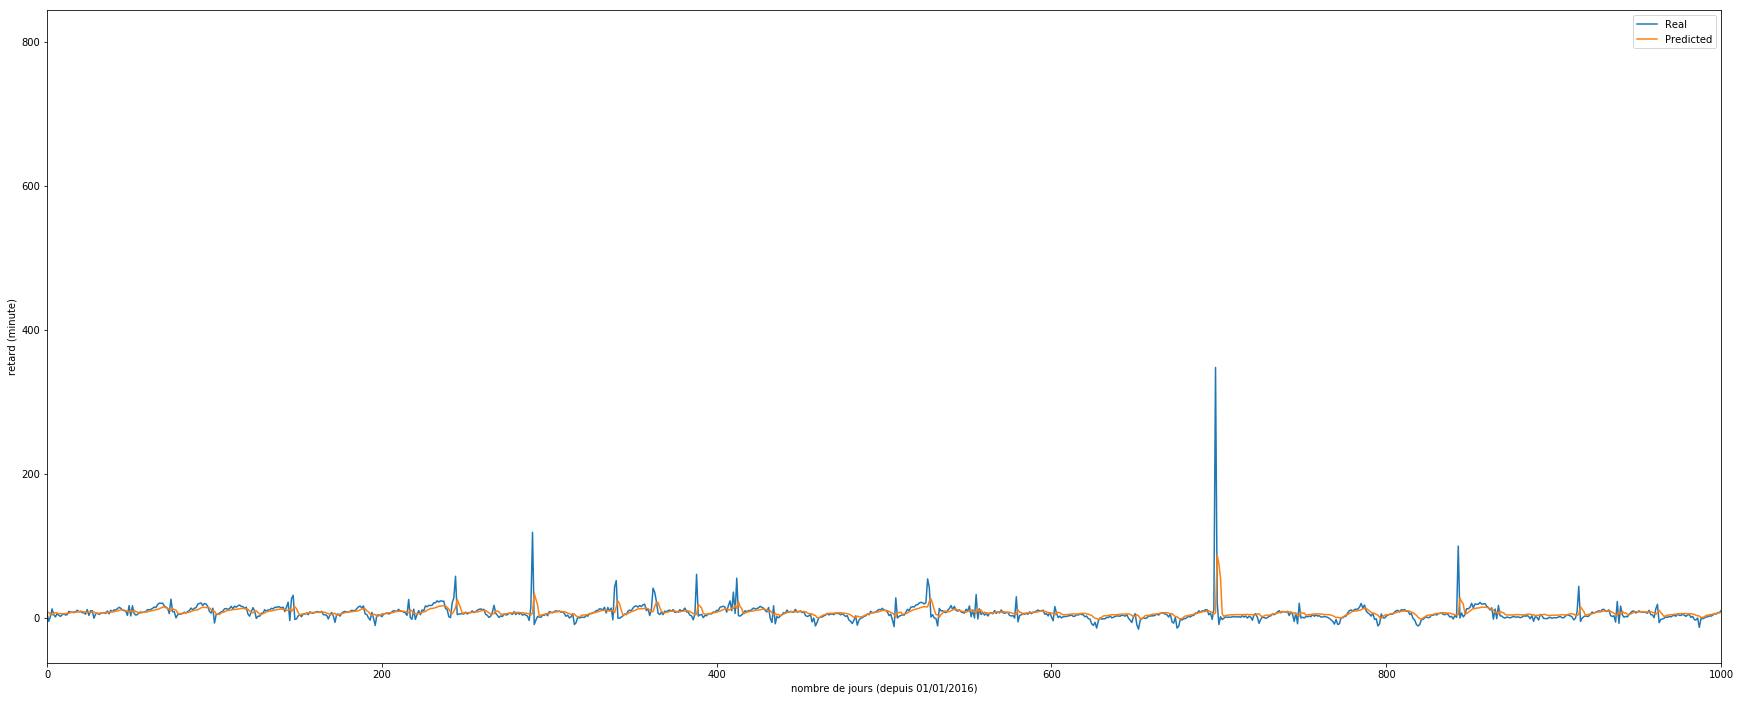

In [35]:
x = list(range(len(train)))

plt.figure(figsize = (30,12))
plt.plot(x, train.values, label="Real")
plt.plot(x, output, label="Predicted")
plt.ylabel("retard (minute)")
plt.xlabel("nombre de jours (depuis 01/01/2016)")
plt.xlim((0,1000))
plt.legend()
plt.savefig("img/arima_predicted_hour.png")
plt.show()

In [31]:
MSE = mean_squared_error(train.values, output)
MAE = mean_absolute_error(train.values, output)
print(MSE, MAE)

173.113094404 5.25429478448


# Modele sans heure

In [10]:
df_arima.drop("CRS_DEP_TIME", axis=1, inplace=True)
df_test.drop("CRS_DEP_TIME", axis=1, inplace=True)

In [11]:
train = df_arima.groupby(["FL_DATE"])["DEP_DELAY"].mean()
test = df_test.groupby(["FL_DATE"])["DEP_DELAY"].mean()

In [12]:
test

FL_DATE
2017-01-01    11.770965
2017-01-02    25.059781
2017-01-03    18.463170
2017-01-04    13.411623
2017-01-05    17.573459
2017-01-06    16.623377
2017-01-07    38.796897
2017-01-08    27.755276
2017-01-09    20.585226
2017-01-10    17.235469
2017-01-11     9.969072
2017-01-12    13.255604
2017-01-13     8.163898
2017-01-14     5.908068
2017-01-15     6.344215
2017-01-16     9.249566
2017-01-17     3.332919
2017-01-18     6.783384
2017-01-19     7.038942
2017-01-20    11.355917
2017-01-21    10.495830
2017-01-22    30.400450
2017-01-23    19.150773
2017-01-24     4.407088
2017-01-25     1.584104
2017-01-26     3.200898
2017-01-27     4.451426
2017-01-28     0.106480
2017-01-29    11.341526
2017-01-30     3.703508
                ...    
2017-06-01     8.611897
2017-06-02    10.028486
2017-06-03     9.274349
2017-06-04    16.291575
2017-06-05    17.524964
2017-06-06    19.463198
2017-06-07    12.482765
2017-06-08    11.034102
2017-06-09    11.939444
2017-06-10     3.298295
2017-06-

In [13]:
model = ARIMA(train, order=(3,2,0), freq="D")
model_fit = model.fit(disp=0)

In [14]:
y_real = test[-30:]

In [15]:
y_real

FL_DATE
2017-06-01     8.611897
2017-06-02    10.028486
2017-06-03     9.274349
2017-06-04    16.291575
2017-06-05    17.524964
2017-06-06    19.463198
2017-06-07    12.482765
2017-06-08    11.034102
2017-06-09    11.939444
2017-06-10     3.298295
2017-06-11     9.941115
2017-06-12     9.961453
2017-06-13    12.837714
2017-06-14    21.710982
2017-06-15    22.254591
2017-06-16    19.071201
2017-06-17    11.485647
2017-06-18    14.444010
2017-06-19    33.637986
2017-06-20    16.258321
2017-06-21    12.191542
2017-06-22    10.080727
2017-06-23    15.897129
2017-06-24    15.744066
2017-06-25     8.268674
2017-06-26     6.139793
2017-06-27    10.565241
2017-06-28    10.377883
2017-06-29     9.459742
2017-06-30    16.579589
Name: DEP_DELAY, dtype: float64

In [16]:
y_pred = model_fit.predict("2016-12-02")
y_pred

2016-12-02     4.297579
2016-12-03    -2.159900
2016-12-04    -0.372818
2016-12-05   -10.285585
2016-12-06     2.034780
2016-12-07     8.995008
2016-12-08     0.414181
2016-12-09    -6.272944
2016-12-10    -0.662148
2016-12-11     4.344241
2016-12-12    -5.937900
2016-12-13     2.710324
2016-12-14     7.132292
2016-12-15    -2.798609
2016-12-16   -14.914405
2016-12-17    -0.116631
2016-12-18   -25.151198
2016-12-19    29.591525
2016-12-20    29.644221
2016-12-21     2.432721
2016-12-22   -14.239609
2016-12-23   -10.824572
2016-12-24    -1.817461
2016-12-25     8.494326
2016-12-26     0.374980
2016-12-27   -13.445673
2016-12-28     4.816196
2016-12-29     6.202677
2016-12-30    -0.884883
2016-12-31    -1.241547
Freq: D, dtype: float64

In [17]:
MSE = mean_squared_error(y_real, y_pred)
MAE = mean_absolute_error(y_real, y_pred)
print(MSE, MAE)

293.689546651 14.629474397


# grid search

In [18]:
import itertools
p = range(1, 8)
d = range(2)
q = range(3)
pdq = list(itertools.product(p, d, q))
print(pdq)

[(1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 1, 0), (4, 1, 1), (4, 1, 2), (5, 0, 0), (5, 0, 1), (5, 0, 2), (5, 1, 0), (5, 1, 1), (5, 1, 2), (6, 0, 0), (6, 0, 1), (6, 0, 2), (6, 1, 0), (6, 1, 1), (6, 1, 2), (7, 0, 0), (7, 0, 1), (7, 0, 2), (7, 1, 0), (7, 1, 1), (7, 1, 2)]


In [19]:
params = list(itertools.product(p, d, q))
top_param = None
top_MAE = 1e6

for param in params:
    model = ARIMA(train, order=param, freq="D")  # ne pas prendre (0,0,0 )=> constante
    model_fit = model.fit(disp=0)
    y_pred = model_fit.predict("2016-12-02")
    MSE = mean_squared_error(y_real, y_pred)
    MAE = mean_absolute_error(y_real, y_pred)
    if MAE < top_MAE:
        top_MAE = MAE
        top_param = param
    print(param, MSE, MAE)

print(top_param)

(1, 0, 0) 73.4401362421 5.97179111079
(1, 0, 1) 70.0520766144 5.87128757021
(1, 0, 2) 61.3364038026 5.90657510391
(1, 1, 0) 215.448563018 13.5646568753
(1, 1, 1) 293.407929846 14.9487392865
(1, 1, 2) 294.003728772 14.8487491178
(2, 0, 0) 71.6395091366 5.92902375728
(2, 0, 1) 64.79307411 5.92327404548
(2, 0, 2) 64.7798060418 5.95621722635
(2, 1, 0) 218.581177115 13.5787053433
(2, 1, 1) 294.037026644 14.8391713362
(2, 1, 2) 292.267807255 14.8888601661
(3, 0, 0) 65.9903767545 5.65954232669
(3, 0, 1) 65.3034866517 5.98110853796
(3, 0, 2) 63.1475340173 5.95834590131
(3, 1, 0) 227.782840418 13.5695378286
(3, 1, 1) 294.04028878 14.8489080735
(3, 1, 2) 292.226380769 14.8921907796
(4, 0, 0) 65.8233914802 5.69211366086
(4, 0, 1) 65.7748616939 6.00665933462
(4, 0, 2) 63.414835643 5.97177046999
(4, 1, 0) 237.218176856 13.593701631
(4, 1, 1) 289.354621635 14.6444085135
(4, 1, 2) 290.487515863 14.7352323562
(5, 0, 0) 64.7270904908 5.80717055218
(5, 0, 1) 66.2378617057 6.15065204846
(5, 0, 2) 65.4410

C:\Anaconda501\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## Prediction

In [20]:
model = ARIMA(train, order=top_param, freq="D")
model_fit = model.fit(disp=0)

In [21]:
output = model_fit.predict(0)
print(output)

2016-01-01     8.820912
2016-01-02     7.605784
2016-01-03     8.887661
2016-01-04    10.575788
2016-01-05    10.167217
2016-01-06    11.230033
2016-01-07     9.921937
2016-01-08     7.668880
2016-01-09     9.488479
2016-01-10     7.417070
2016-01-11    13.650270
2016-01-12     8.113214
2016-01-13     7.561162
2016-01-14     7.312440
2016-01-15     7.000121
2016-01-16     9.389483
2016-01-17     8.571478
2016-01-18     8.554219
2016-01-19     9.819891
2016-01-20     7.985739
2016-01-21     6.534586
2016-01-22     7.532920
2016-01-23    11.294059
2016-01-24     9.705852
2016-01-25     8.329909
2016-01-26     8.311437
2016-01-27     5.388414
2016-01-28     4.569853
2016-01-29     5.083587
2016-01-30     5.659738
                ...    
2016-12-02     5.766538
2016-12-03     6.044168
2016-12-04     4.612375
2016-12-05    10.118173
2016-12-06     9.665469
2016-12-07     6.809948
2016-12-08     7.213130
2016-12-09     8.934332
2016-12-10     8.915160
2016-12-11     7.676674
2016-12-12    11

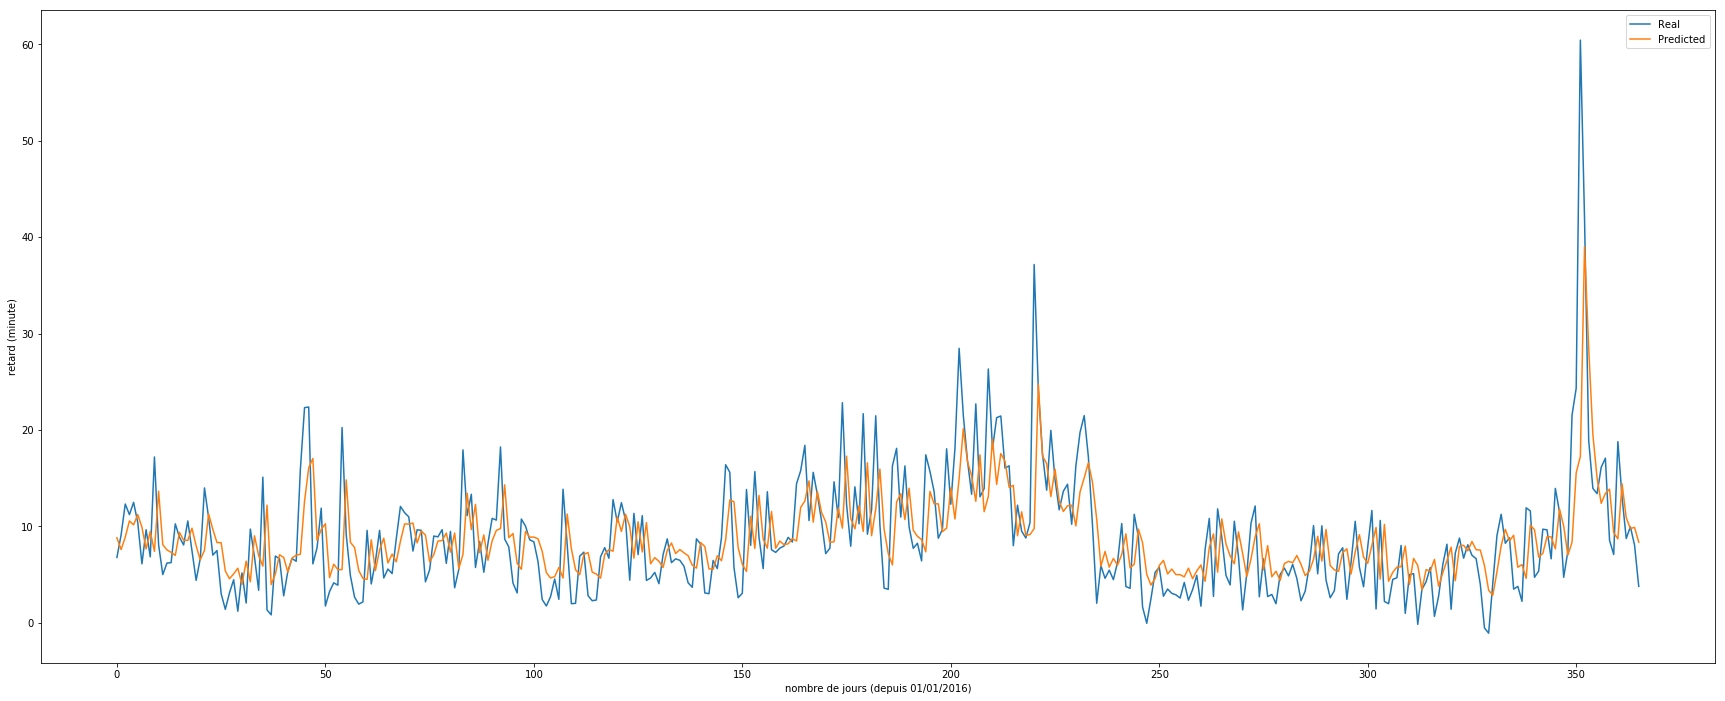

In [22]:
x = list(range(len(train)))

plt.figure(figsize = (30,12))
plt.plot(x, train.values, label="Real")
plt.plot(x, output.values, label="Predicted")
plt.ylabel("retard (minute)")
plt.xlabel("nombre de jours (depuis 01/01/2016)")
plt.legend()
plt.savefig("img/arima_predicted.png")
plt.show()

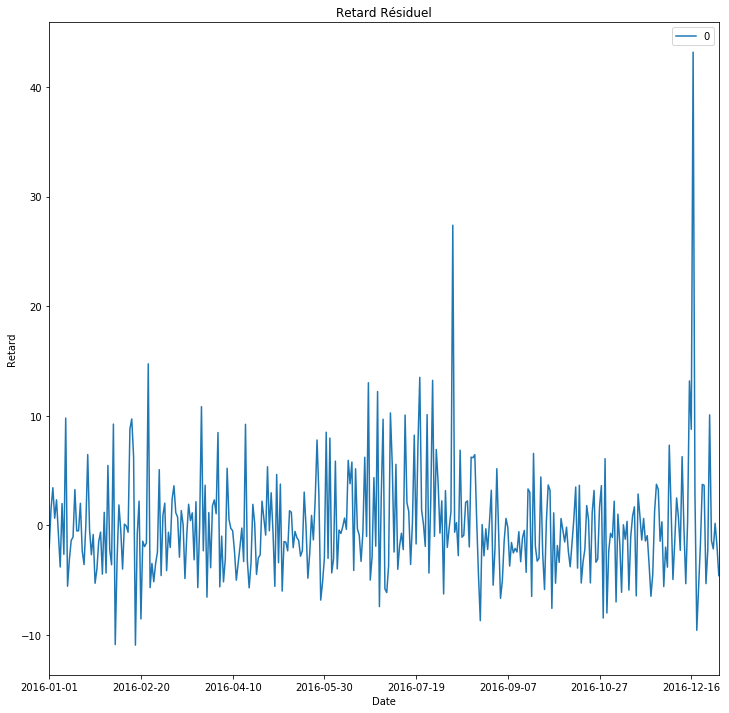

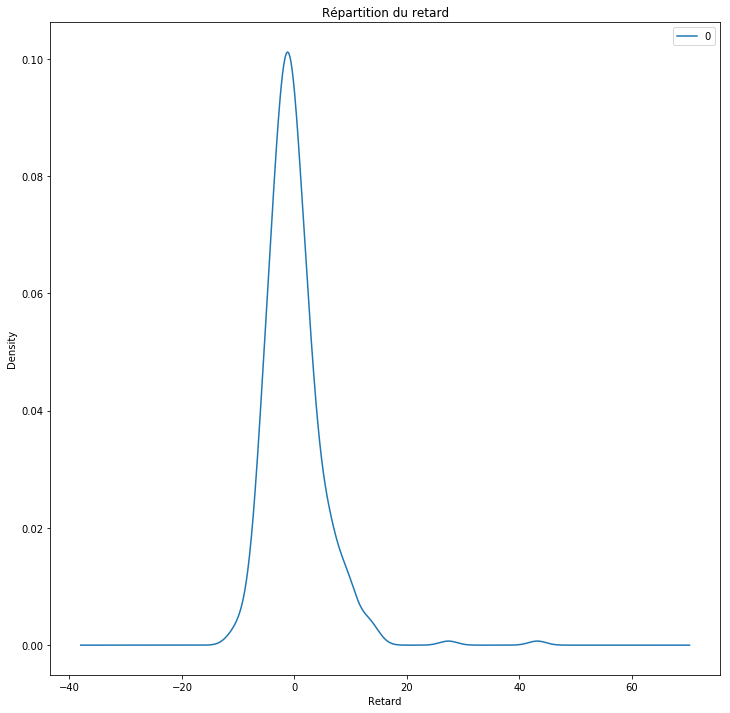

In [28]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (12,12))
plt.title("Retard Résiduel")
plt.ylabel("Retard")
plt.xlabel("Date")
plt.savefig("img/retard_residuel.png")
plt.show()

residuals.plot(kind='kde', figsize = (12,12))
plt.title("Répartition du retard")
plt.xlabel("Retard")
plt.savefig("img/distrib_retard.png")
plt.show()

In [24]:
print(residuals.describe())

                0
count  366.000000
mean     0.003087
std      5.105125
min    -10.930481
25%     -3.071068
50%     -0.714800
75%      2.095803
max     43.188192


In [25]:
validation = []
for date in test.index:
    new_date = "2016" + date[4:]
    validation.append(output[new_date])

In [26]:
MSE = mean_squared_error(test.values, validation)
MAE = mean_absolute_error(test.values, validation)
print(MSE, MAE)

52.6228785744 4.9656802055


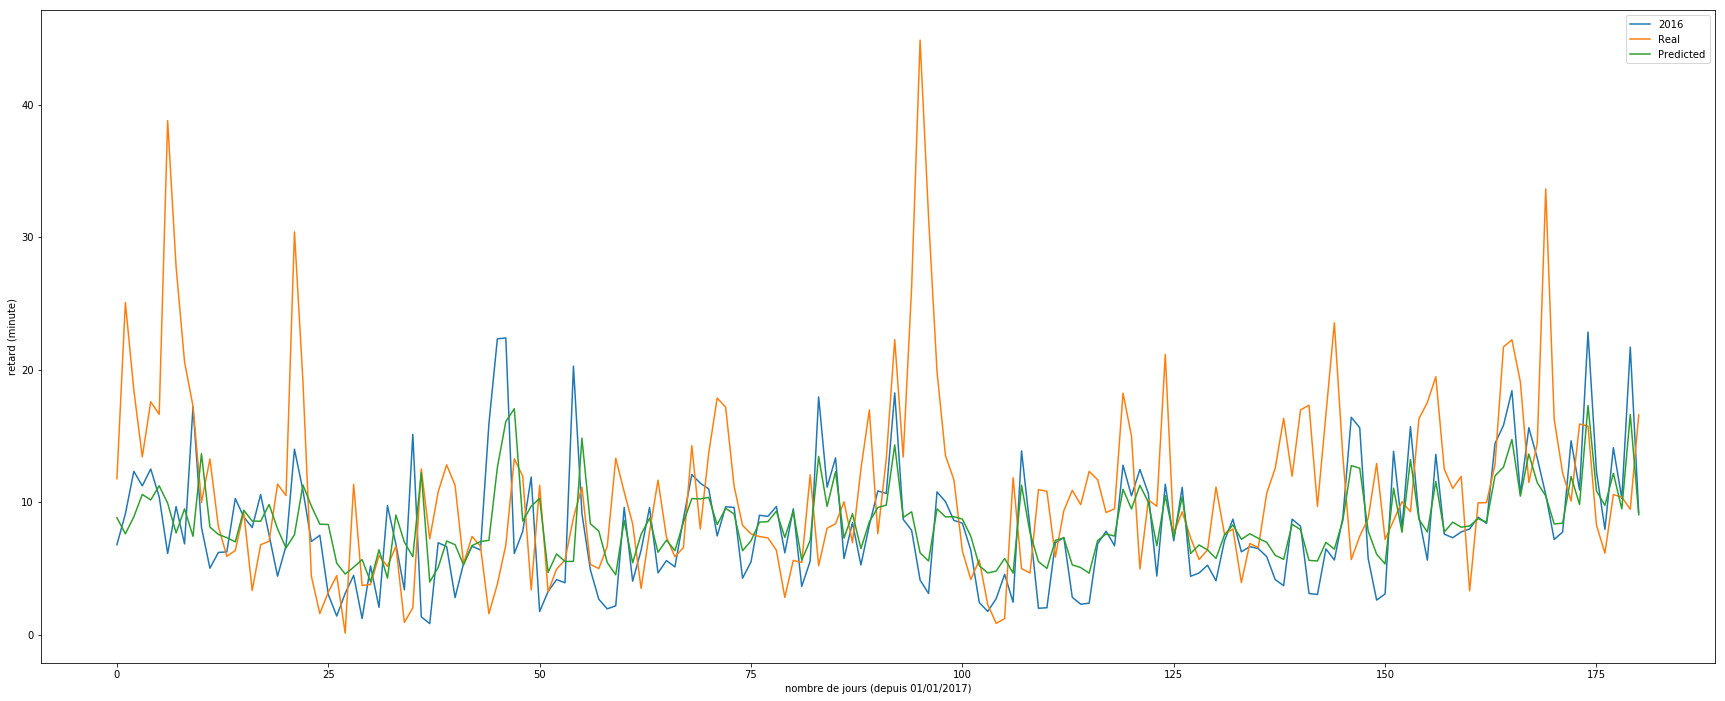

In [27]:
x = list(range(len(validation)))

plt.figure(figsize = (30,12))
plt.plot(x, train.values[:len(validation)] , label="2016")
plt.plot(x, test.values, label="Real")
plt.plot(x, validation, label="Predicted")
plt.ylabel("retard (minute)")
plt.xlabel("nombre de jours (depuis 01/01/2017)")
plt.legend()
plt.savefig("img/arima_2017.png")
plt.show()

## Optimisation 2

In [200]:
from pandas.tools.plotting import autocorrelation_plot

C:\Anaconda501\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


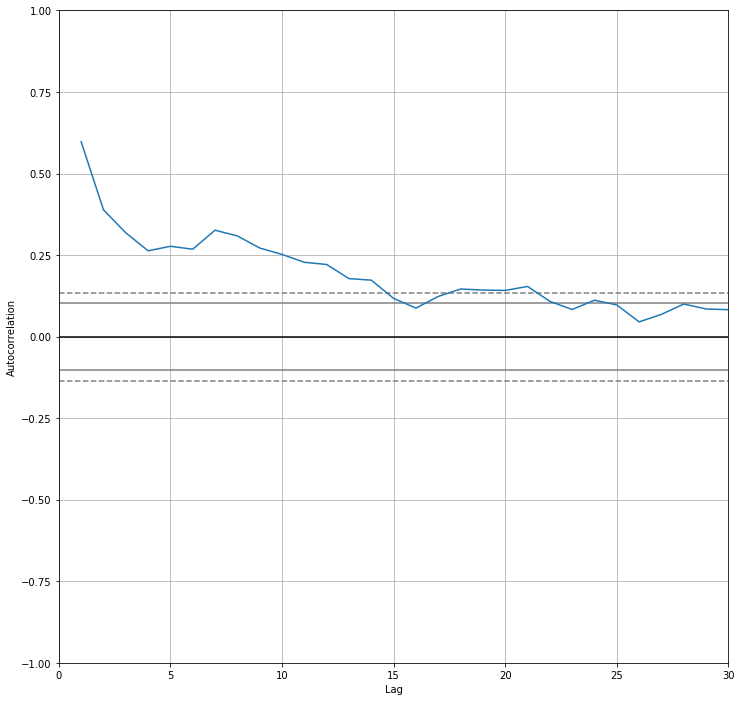

In [201]:
plt.figure(figsize = (12,12))
autocorrelation_plot(train)
plt.xlim(0,30)
plt.show()

In [209]:
AR = 7

In [210]:
model2 = ARIMA(train, order=(AR,0,0), freq="D")
model_fit2 = model2.fit(disp=0)
output = model_fit2.predict(0)
print(model_fit2.summary())

                              ARMA Model Results                              
Dep. Variable:              DEP_DELAY   No. Observations:                  366
Model:                     ARMA(7, 0)   Log Likelihood               -1106.871
Method:                       css-mle   S.D. of innovations              4.974
Date:                Mon, 27 Nov 2017   AIC                           2231.742
Time:                        16:26:08   BIC                           2266.866
Sample:                    01-01-2016   HQIC                          2245.699
                         - 12-31-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.8364      1.096      8.064      0.000       6.689      10.984
ar.L1.DEP_DELAY     0.5399      0.051     10.488      0.000       0.439       0.641
ar.L2.DEP_DELAY    -0.0364      

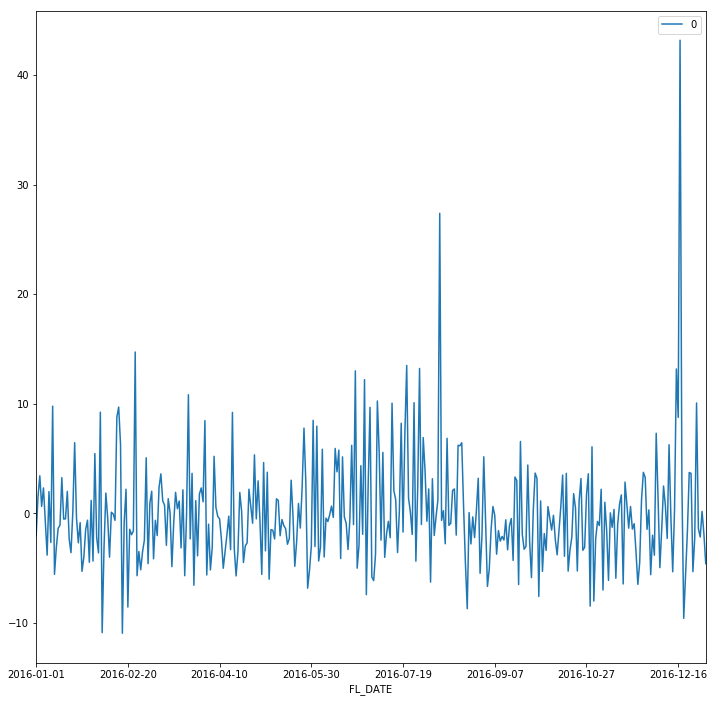

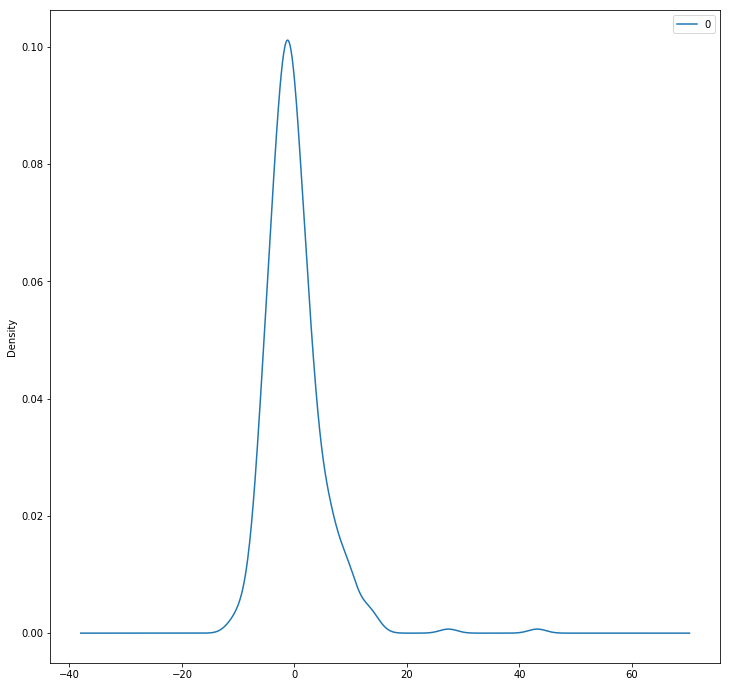

In [211]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (12,12))
plt.show()
residuals.plot(kind='kde', figsize = (12,12))
plt.show()

In [212]:
print(residuals.describe())

                0
count  366.000000
mean     0.003087
std      5.105125
min    -10.930481
25%     -3.071068
50%     -0.714800
75%      2.095803
max     43.188192


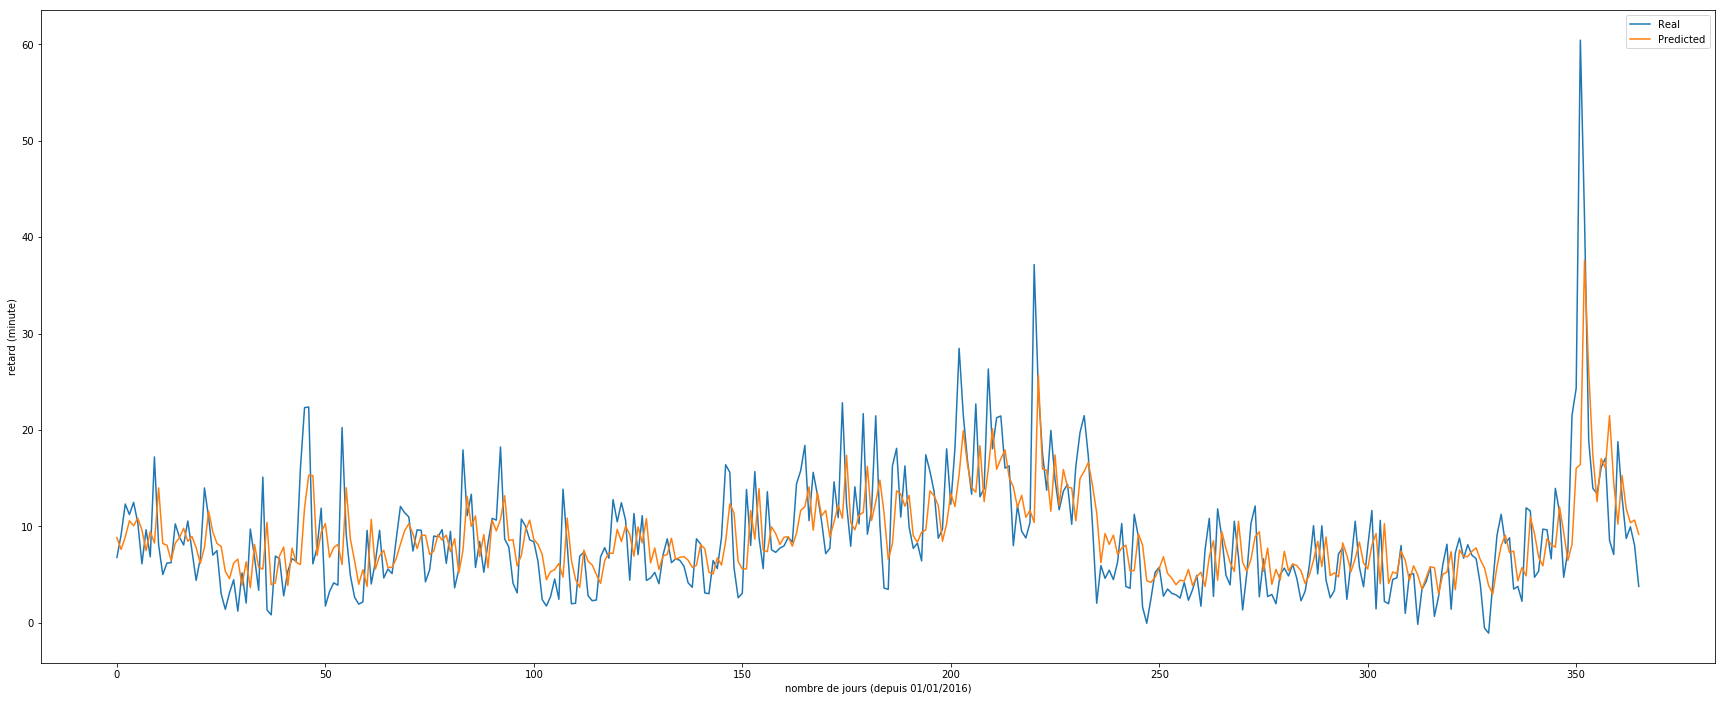

In [213]:
plt.figure(figsize = (30,12))
plt.plot(range(len(train)), train, label="Real")
plt.plot(range(len(output)), output, label="Predicted")
plt.ylabel("retard (minute)")
plt.xlabel("nombre de jours (depuis 01/01/2016)")
plt.legend()
plt.savefig("img/arima_predicted.png")
plt.show()

## Forecast 2017

In [240]:
x = list(range(len(validation)))
y_real = test.values

In [241]:
y_pred = model_fit2.forecast(steps=5)[0]

In [242]:
y_pred

array([ 5.87238914,  8.81569118,  9.3741633 ,  8.9402785 ,  8.7369552 ])

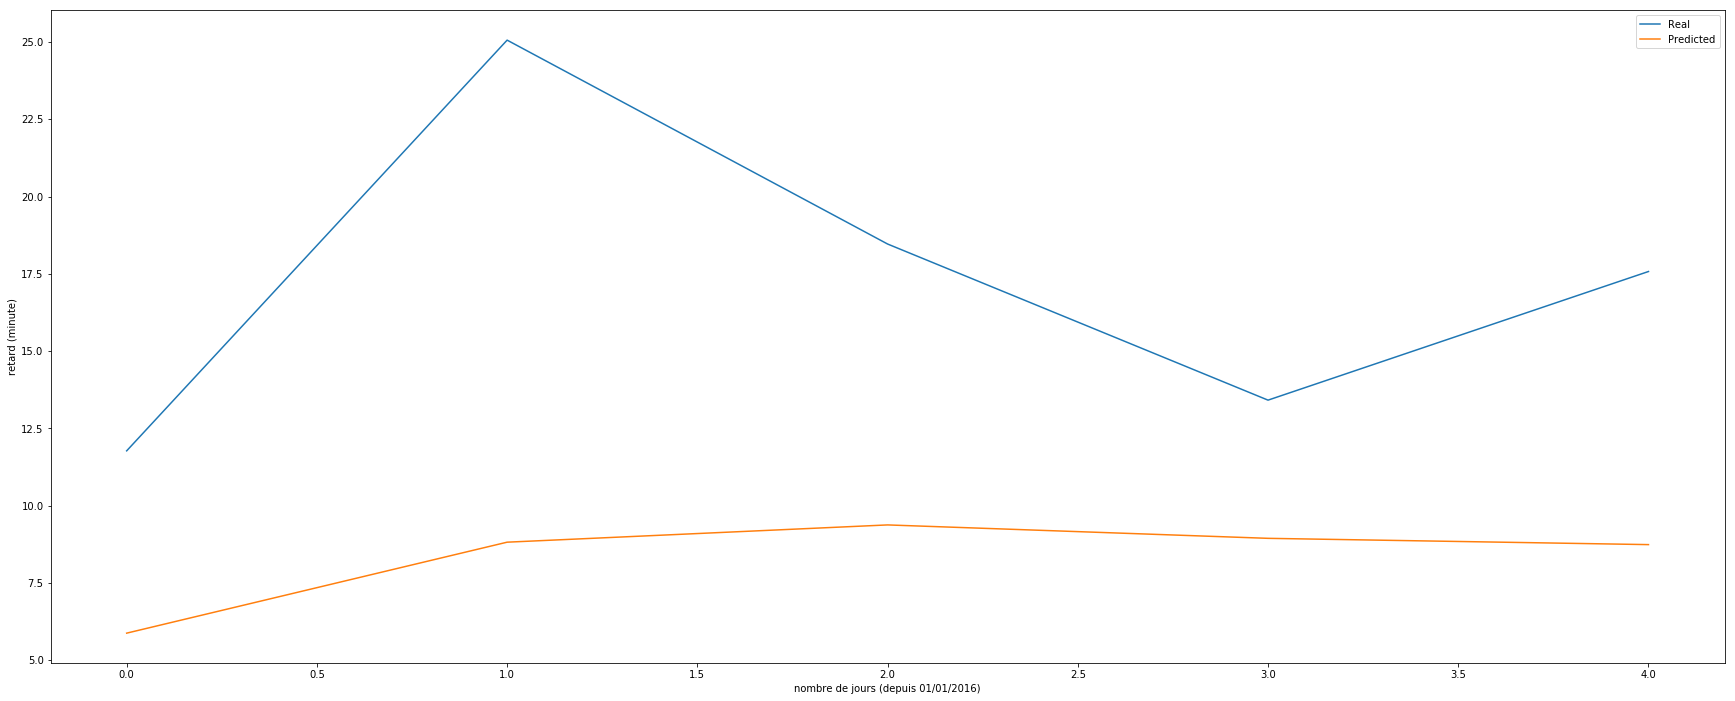

In [243]:
x = list(range(5)) # list(range(len(validation)))

plt.figure(figsize = (30,12))
plt.plot(x, y_real[:5] , label="Real")
plt.plot(x, y_pred , label="Predicted")
plt.ylabel("retard (minute)")
plt.xlabel("nombre de jours (depuis 01/01/2016)")
plt.legend()
plt.savefig("img/arima_predicted.png")
plt.show()